# CLUSTERING

- is an unsupervised machine learning algorithm that groups similar data points without predefined labels
## Cluster centers = centroids refer to the mean point of clusters

**AIM**

``1)Intra- class similarity is high``
- similarity between members of the same group

``2)Intra - class variance is low``
- Data points in each cluster are tightly knit(compacted)

``3)Inter - class similarity is LOW``
- similarity between members of the different  group

``4)Inter -class variance is high``
- There is little to no  ambiguity about which cluster the datapoint belongs to


## CLustering Types

**1. Non - hierarchical clustering - KMeans**

You must specify the clusters in advance

is an algorithm that chooses k initial clusters and reasigns the observations until no improvement is needed

- 1. State K initial seeds
- 2. Reassign  each observation to the closest cluster 
- 3. Recompute cluster centers
- 4. Reassign observation to one cluster based on a certain rule
- 5. Stop when there is no reallocation 

> KMeans is used to calculate the **K Cluster Centers**  which is assumed to be obtained by calculating the **arithmetic mean of all the  datapoints belonging to that cluster**

>Each cluster center is recalculated at the beginning of a new iteration

>After cluster center has been recalculated and  a given data point is  more closer to the center of a diff cluster than it is to its own center ,the point is reassigned to the closest center

>centroids match the cluster centers as they are at the center of the datapoints

>clustering stops when there is no need for reassignment of the observations and centroids dont need to move


**2. Hierarchical clustering**

Here you dont have to specify the clusters at advance

- **Agglomerative clustering(Bottom up)**

Beginns with n clusters and iteratively merges the two close clusters and so on until a predefined stopping criteria is met 


                           
- **Divise clustering (Top Down)**

Begins with 1 cluster and iteratives splits the cluster into smaller clusters until a predefined stopping criteria is met



**Semi-Supervised Learning**


- Combines elements of supervised and supervised learning

- Useful when labeled data is scarce and unlabeled data plentiful


## METRICS FOR EVALUATING CLUSTER FITNESS
- 1.**Variance ratio / Calinski-harabasz score(Ch)**
- 2.**silhoutte score**
- 3.**Inertia /Within cluster sum of squares(wcss)**
- 4.**Elbow plot**

### Variance ratio


>**VR** = Between cluster Variance / Within cluster variance 

- **Between cluster Variance** How far apart cluster centroids are from each other
- **Within cluster variance** How  tightly packed are the points in each cluster

>**VR** = Separation / Compactness

- **High variance ratio**==== Good  Clustering /Better fit 

The clusters are well separated from each other 
The points in each cluster are well packed 

- **Low variance ratio**==== Poor Clustering /Bad fit 

The clusters overalap too much
The points spread out within clusters

>**calinski_harabasz_score**

This score works by computing a **ratio of between-cluster distance to inter-cluster distance**

We can assume that **good clusters** will have **smaller distances** between the points in each cluster and larger distances to the points in other clusters 


| **Goal**                      | **Method**                  | **Key Metric**               | **Ideal Value**               |
| ----------------------------- | --------------------------- | ---------------------------- | ----------------------------- |
| **Find optimal `k`**          | **Elbow Method**            | **Inertia (WCSS)**           | **"Elbow" in curve**          |
| **Find optimal `k`**          | **Silhouette Score**        | **Silhouette Score**         | **Highest value**             |
| **Find optimal `k`**          | **Calinski-Harabasz Index** | **Variance Ratio Criterion** | **Highest value**             |
| **Calculate cluster centers** | **KMeans algorithm**        | **Mean of each cluster**     | **Centroids (average point)** |



In [1]:
# Use Make_blobs to generate a synthetic clustering dataset
from sklearn.datasets import make_blobs
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y =make_blobs(n_samples = 400,
               n_features =2,
               centers = 6,
               cluster_std =0.8) # controls tighness of clusters

# Plotting

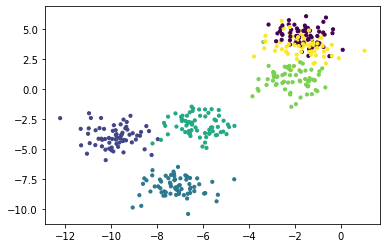

In [3]:
plt.scatter(X[:,0],X[:,1],c = y,s = 10);

- The data points are colored differently because **make_blobs** assigns **ground truth labels** when generating the synthetic dataset. These labels (y) are then used to color the points in the scatter plot using the **c = y argument**

- There appear to be 6 visible clusters in the scatter plot, but the cluster centers (centroids) are not shown. We can use **KMeans clustering** to **find the centroids of these clusters** and compare them with the actual distribution of the data points

# 1. NONHIERARCHICAL CLUSTERING 
## KMEANS

# FINDING CENTROIDS USING KMEANS

# ``K MEANS``

In [4]:
from sklearn.cluster import KMeans

# instantiate the model
k_means = KMeans(n_clusters = 6)

# fit the model

k_means.fit(X)

KMeans(n_clusters=6)

In [5]:
# Predictions
cluster_predictions = k_means.predict(X)
# or
# cluster_assignments = k.means.predict(X)
# predictions

In [6]:
labels = k_means.labels_
# labels

In [7]:
# As long as you using same data to fit and predict ...cluster_predictions = cluster_assignments = labels

# k_means.predict(X) = k_means.labels_

# PLOT

# Find **Cluster centers**

In [8]:
centers = k_means.cluster_centers_
centers

array([[-1.12993231,  3.16996533],
       [-9.78452918, -3.93851863],
       [-1.89743332,  4.4788394 ],
       [-6.17911744, -2.95590481],
       [-7.1711478 , -8.08560155],
       [-2.12991161,  0.74649011]])

# Final plot with centroids

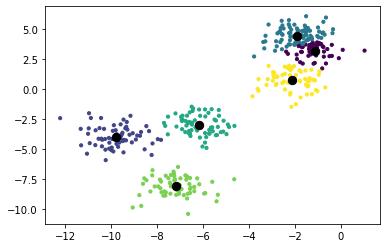

In [9]:
plt.scatter(X[:,0],X[:,1],c = cluster_predictions, s=10);
centers = k_means.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c ="Black",s =70);

The centroids (black dots)  match up with the cluster centers Each black dot appears to be located at the center of a group of points

# Dealing With an Unknown Number of Clusters

- FINDING OPTIMAL VALUE OF K WHEN THE CLUSTER CENTERS ARE UNKNOWN

# Evaluating Cluster Fitness With  Unknown Ground Truth

**1.calinski_harabasz Score(ch) / VARIANCE RATIO**

**2.WithClusterSum of Squares(wccs) score  / INERTIA**

**3.Silhoutte score**

# ASSUME centers(clusters are unknown)


In [10]:
X_2,y_2= make_blobs(n_samples =400,
                n_features = 2,
                centers =np.random.randint(3,8),
                cluster_std = 0.8)

# Try to plot and see the number of clusters manually

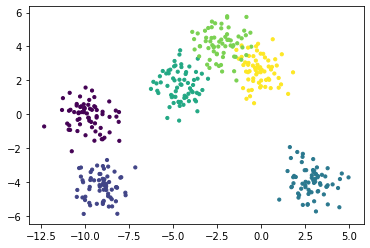

In [11]:
plt.scatter(X_2[:,0],X_2[:,1],c=y_2,s=10);

- As we can manually see there are 6 clusters

# Lets use KMEANS To find  number of clusters

In [12]:
# Model and fit KMeans
k_means_3 = KMeans(n_clusters = 3).fit(X_2)
k_means_4 = KMeans(n_clusters = 4).fit(X_2)
k_means_5 = KMeans(n_clusters = 5).fit(X_2)
k_means_6 = KMeans(n_clusters = 6).fit(X_2)
k_means_7 = KMeans(n_clusters = 7).fit(X_2)


k_list = [k_means_3,k_means_4,k_means_5,k_means_6,k_means_7]

| **Goal**                      | **Method**                  | **Key Metric**               | **Ideal Value**               |
| ----------------------------- | --------------------------- | ---------------------------- | ----------------------------- |
| **Find optimal `k`**          | **Elbow Method**            | **Inertia (WCSS)**           | **"Elbow" in curve**          |
| **Find optimal `k`**          | **Silhouette Score**        | **Silhouette Score**         | **Highest value**             |
| **Find optimal `k`**          | **Calinski-Harabasz Index** | **Variance Ratio Criterion** | **Highest value**             |



---

# Metric 1
## Calinski Harabasz score

In [13]:
from sklearn.metrics import calinski_harabasz_score

In [14]:
CH_score = []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(X_2,labels))

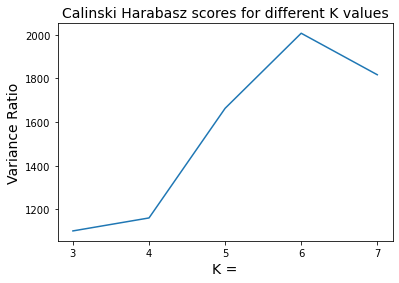

In [15]:
plt.plot([3,4,5,6,7],CH_score)
plt.title("Calinski Harabasz scores for different K values",fontsize = 14)
plt.xticks([3,4,5,6,7])
plt.xlabel("K =",fontsize = 14)
plt.ylabel("Variance Ratio",fontsize = 14)
plt.show();

### K = 6 (Elbow)

--------------

# Metric 2
## Inertia / With Cluster Sum of Squares score

In [16]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

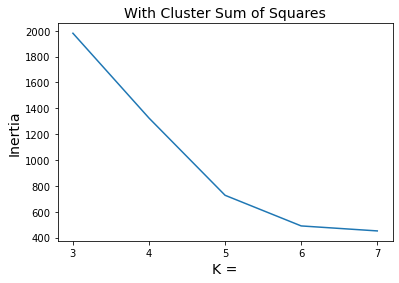

In [17]:
plt.plot([3,4,5,6,7],wcss_score)
plt.xticks([3,4,5,6,7])
plt.xlabel("K =",fontsize =14)
plt.title("With Cluster Sum of Squares",fontsize =14)
plt.ylabel("Inertia",fontsize =14)
plt.show;

### K = 5 or 6 clusters and con firming with the original plot we are correct (6 clusters)

-----

# Metric 3
## Silhouette score

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for model in k_list:
    labels = model.labels_
    silhouette_scores.append(silhouette_score(X_2,labels))

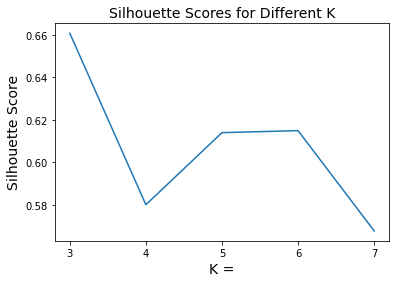

In [19]:
plt.plot([3,4,5,6,7],silhouette_scores)
plt.xticks([3,4,5,6,7])
plt.xlabel("K =",fontsize =14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Scores for Different K", fontsize=14)
plt.show();

The optimal number of clusters (K) is 3, based on the silhouette score plot

# 2.HIERARCHICAL  AGGLOMERATIVE CLUSTERING



- Hierarchical Agglomerative Clustering is a **bottom-up** clustering technique
- It starts by **treating each data point as its own cluster**, then merges the most similar clusters, step by step (iteratively) until all points are grouped into a single cluster or until a stopping condition is met (like  desired number of clusters k)
- Unlike KMeans ...here no need to pre specify the number of clusters upfront

**How Distance Is Measured Between Clusters**

This is determined by the linkage criterion:

| **Linkage Type** | **Description**                                                                                              |
| ---------------- | ------------------------------------------------------------------------------------------------------------ |
| **`single`**     | Distance between the **closest** points of two clusters                                                      |
| **`complete`**   | Distance between the **farthest** points of two clusters                                                     |
| **`average`**    | **Average** distance between all pairs of points in the two clusters                                         |
| **`ward`**       | Merges clusters that result in the **minimum increase in total within-cluster variance** (similar to KMeans) |


### Linking Similar Clusters Together (Linkage Criteria)
In Hierarchical Agglomerative Clustering, clusters are merged based on their **similarity determined by a linkage criterion**

As the algorithm progresses, clusters grow larger, and the distance is always computed between two existing clusters.

**ward** (default): 

- picks the two clusters to merge in a way that it minimizes the increase in total variance 
- poroduces compact.equally sized clusters

**average**: 

- merges the two clusters that have the smallest **_average_** distance between all their points

**complete** (or maximum linkage): 

- merges the two clusters that have the smallest **_maximum_** distance between their points.
- results in tighter more separated clusters

>One advantage of HAC is that we can easily visualize the results at any given step using visualizations such as
**Dendrograms and Clustergrams**

**Dendrograms**  :Tree-like diagrams that show how clusters are merged step-by-step

**Clustergrams**  :Heatmap-style visualizations that show how samples group across different cluster levels

## HAC Code along

In [20]:
np.random.seed(0)

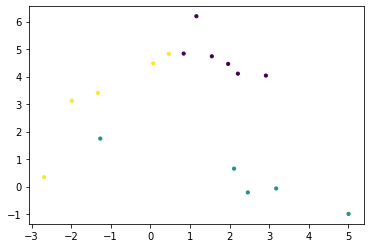

In [21]:
# We look at a dataset with 16 datapoints and 3 clusters

X,y = make_blobs(n_samples = 16,
                n_features = 2,
                centers =3,
                cluster_std =1.3)

plt.scatter(X[:,0],X[:,1],c =y,s =10);

# Agglomerative Clustering Model

In [22]:
from sklearn.cluster import AgglomerativeClustering 

# Instantiate the model
agg_clust = AgglomerativeClustering(n_clusters = 3)

# Fit the model and predict at once
#AgglomerativeClustering object has no attribute 'predict'

predictions =  agg_clust.fit_predict(X)

# Plot

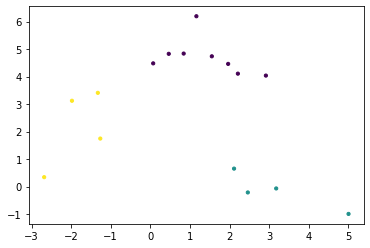

In [23]:
plt.scatter(X[:,0],X[:,1],c =predictions ,s =10);

# Going back to the 6 cluster dataset

- Let's try  and use the dataset  we used in KMeans  and perform Hac with 3 linkage criterion

## Original without modelling

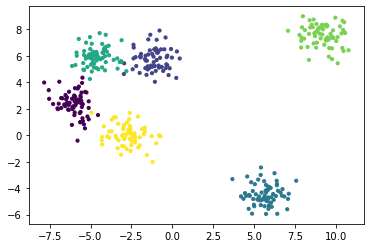

In [24]:
k = 6
m = 400
X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=0.8,  random_state=1234)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

# Agglomerative Clustering with linkage criterion

- We will create 3 different versions of the HAC algorithm and see how different linkage setting affect the performance of each

In [25]:
from sklearn.cluster import AgglomerativeClustering 
# ward
# average
# complete

In [26]:
# Instantiate the model with linkage criterion
agg_ward = AgglomerativeClustering(linkage = 'ward',n_clusters = 6)
agg_average = AgglomerativeClustering(linkage = 'average',n_clusters = 6)
agg_complete = AgglomerativeClustering(linkage = 'complete',n_clusters = 6)

# Fit  and predict the models
ward_prediction = agg_ward.fit_predict(X)
average_prediction = agg_average.fit_predict(X)
complete_prediction = agg_complete.fit_predict(X)

# Plotting each HAC  Linkage Criterion

## 1.WARD

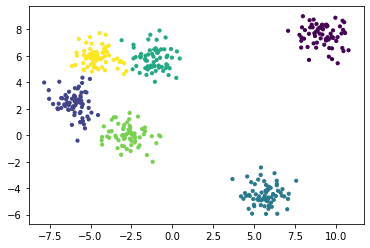

In [27]:
plt.scatter(X[:,0],X[:,1],c=ward_prediction,s =10);

## 2. AVERAGE

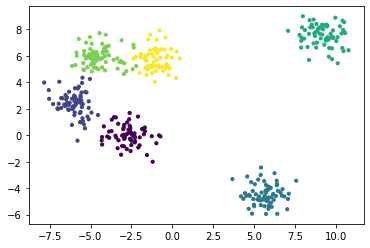

In [28]:
plt.scatter(X[:,0],X[:,1],c=average_prediction,s =10);

## 3.COMPLETE 

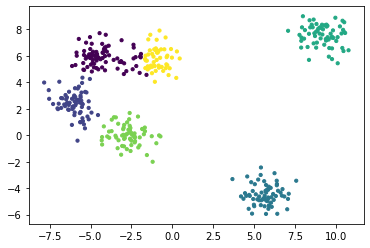

In [29]:
plt.scatter(X[:,0],X[:,1],c=complete_prediction,s =10);

- The results all look pretty similar, except for some small differences in the two upper left clusters

# The dendrogram for the ward cluster

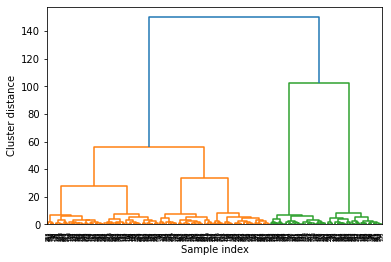

In [30]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()               # Get Current Axes
bounds = ax.get_xbound()    #  x-axis bounds of the plot ‚Äî a tuple like (xmin, xmax)
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

- We have 400 cases here which makes the dendrogram look messy

- We're mostly interested in the **last few clusters** so let's truncate the diagram to make it more interpretable and see how it looks

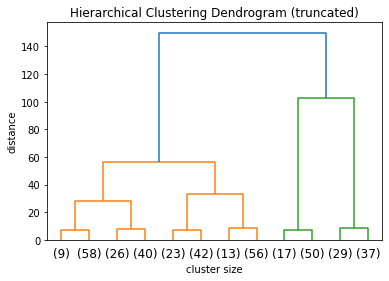

In [31]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')

dendrogram(linkage_array,  truncate_mode='lastp', p=12)
#p=12 tells the dendrogram to
#truncate the plot and only show the last 12 merged clusters
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

# EVALUATION

- Let's compare the HAC performance with that of the KMEANS Clustering

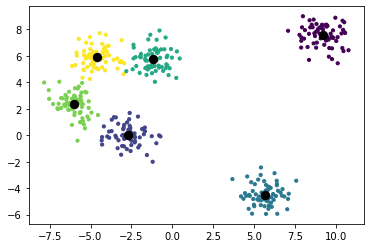

In [32]:
k_means = KMeans(n_clusters =6)
k_means.fit(X)
predictions = k_means.predict(X)

plt.scatter(X[:,0],X[:,1],c =predictions, s =10);
centers = k_means.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c = 'black', s =70);

Algorithms run

k_means, agg_comp, agg_avg, agg_ward

By accessing the .labels attribute for each of them, you get the array with associated cluster labels. Because we generated the data, we can actually compare these with the actual cluster labels, stored in y.

In [33]:
labels_kmeans = k_means.labels_
labels_comp = agg_complete.labels_
labels_avg = agg_average.labels_
labels_ward = agg_ward.labels_

## Other metrics that can be used to evaluate cluster fitness

| **Metric**                    | **Purpose**                                             | **Requires True Labels?** | **Range** | **Interpretation**                                                                           |
| ----------------------------- | ------------------------------------------------------- | ------------------------- | --------- | -------------------------------------------------------------------------------------------- |
| **Adjusted Rand Index (ARI)** | Measures similarity between predicted and true clusters | ‚úÖ Yes                     | -1 to 1   | üîπ Closer to **1** is better (perfect match)                                                 |
| **Fowlkes-Mallows Score**     | Geometric mean of precision and recall of clustering    | ‚úÖ Yes                     | 0 to 1    | üîπ Closer to **1** is better                                                                 |
| **Calinski-Harabasz Index**   | Ratio of between-cluster dispersion to within-cluster   | ‚ùå No                      | Unbounded | üîπ **Higher** score means better-defined clusters                                            |
| **Silhouette Coefficient**    | Measures cohesion and separation of clusters            | ‚ùå No                      | -1 to 1   | üîπ Closer to **1** = dense & well-separated clusters<br>üîπ Closer to **-1** = bad clustering |


## Adjusted Rand Index

In [34]:

from sklearn import metrics

print("Adjusted Rand Index Scores:")
print("KMeans:           ", metrics.adjusted_rand_score(labels_kmeans, y))
print("Ward Linkage:     ", metrics.adjusted_rand_score(labels_ward, y))
print("Average Linkage:  ", metrics.adjusted_rand_score(labels_avg, y))
print("Complete Linkage: ", metrics.adjusted_rand_score(labels_comp, y))


Adjusted Rand Index Scores:
KMeans:            0.9700191267241777
Ward Linkage:      0.9701102539985723
Average Linkage:   0.9532034914705111
Complete Linkage:  0.9124580390976879


## Fowlkes-Mallows score

In [35]:
from sklearn import metrics

print("Fowlkes-Mallows Scores:")
print("KMeans:           ", metrics.fowlkes_mallows_score(labels_kmeans, y))
print("Ward Linkage:     ", metrics.fowlkes_mallows_score(labels_ward, y))
print("Average Linkage:  ", metrics.fowlkes_mallows_score(labels_avg, y))
print("Complete Linkage: ", metrics.fowlkes_mallows_score(labels_comp, y))


Fowlkes-Mallows Scores:
KMeans:            0.9749543352953763
Ward Linkage:      0.9750304619710456
Average Linkage:   0.9609163225853565
Complete Linkage:  0.9269904799684048


## Calinski-Harabasz Index

In [36]:
from sklearn import metrics

print("Calinski-Harabasz Scores:")
print("KMeans:           ", metrics.calinski_harabasz_score(X, labels_kmeans))
print("Ward Linkage:     ", metrics.calinski_harabasz_score(X, labels_ward))
print("Average Linkage:  ", metrics.calinski_harabasz_score(X, labels_avg))
print("Complete Linkage: ", metrics.calinski_harabasz_score(X, labels_comp))


Calinski-Harabasz Scores:
KMeans:            3174.11496248782
Ward Linkage:      3138.607529679967
Average Linkage:   3074.3514930868614
Complete Linkage:  2865.422513540867


## Silhouette coefficient
- is calculated using the mean intra-cluster distance, as well as the mean distance to the nearest cluster for each sample in the dataset.

In [37]:
from sklearn import metrics

print("Silhouette Scores:")
print("KMeans:           ", metrics.silhouette_score(X, labels_kmeans))
print("Ward Linkage:     ", metrics.silhouette_score(X, labels_ward))
print("Average Linkage:  ", metrics.silhouette_score(X, labels_avg))
print("Complete Linkage: ", metrics.silhouette_score(X, labels_comp))


Silhouette Scores:
KMeans:            0.6933893339039695
Ward Linkage:      0.6900802954648233
Average Linkage:   0.6836833952775418
Complete Linkage:  0.662633317088521


# Semi-Supervised Learning
- Combines elements of the supervised  and unsupervised learning 
- Useful when labeled data is scarce and unlabeled data plentiful

##  Semi-Supervised Learning & Look-Alike Models ‚Äì Summary

### Look-Alike Models
- Use **clustering** and **similarity metrics** to find potential customers who resemble your most valuable existing ones.
- Commonly used for **market segmentation** and **prospecting**.
- Helps focus marketing efforts on high-potential leads.

---

### Semi-Supervised Learning
- Combines **a small labeled dataset** with a **large unlabeled dataset**.
- Steps:
  1. Train a model on labeled data.
  2. Predict labels for the unlabeled data (**pseudo-labels**).
  3. Combine both datasets.
  4. Retrain the model on the larger, mixed dataset.
- Useful when labeling is **costly or time-consuming**.

---

### Benefits
- **Improves model performance** without needing more labeled data.
- **Enhances customer acquisition** through smarter targeting.
- Reduces **manual labeling costs**.

---

### Risks
- **Feedback loops**: Incorrect pseudo-labels can reinforce model errors.
- **Noisy data** can reduce model effectiveness.
- Always validate with a **clean, labeled test set**.

---

### Insight
Combining **supervised** and **unsupervised** learning unlocks powerful, cost-effective solutions in real-world machine learning applications.



## When looking for the optimal value of K for K-means clustering, it is recommended to
- find the elbow on the graph and choose that many clusters for K

## If a poor choice of k is picked, e.g. misinterpreting the WCSS plot, then (Choose all that apply.)

- If k is too large, some clusters get chopped into multiple pieces

- If k is too small, separate clusters get merged

## Which preprocessing steps are needed for K-means clustering in scikit-learn?

- Missing values are replaced or removed

- All data must be numerical

## How does clustering aim to group objects?

- Intra-class similarity is high and inter-class similarity is low

## Which of the following statements about classification and clustering are correct?


- The specific classes to group into are unknown in clustering.

- The specific classes to group into are known in classification.